<a href="https://colab.research.google.com/github/AshishRam7/Fruit-and-Vegetable-Classification---CNN/blob/main/Fruit_and_Vegetable_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#Mounting the data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Link: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition

In [60]:
import tensorflow as tf
#from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

##Performing Data Preprocessing



##Training Image preprocessing:

In [61]:
training_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_and_Vegetables_Classification/train',
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (64, 64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


##Validation image set preprocessing:


In [62]:
validation_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_and_Vegetables_Classification/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


##Building Model:

In [63]:
cnn = tf.keras.models.Sequential()

##Building Convolutional Layer

First Convulational Layer:

In [64]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(64,64,3)))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

Second Convolutional Layer:

In [65]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

Flattening the layers:

In [66]:
cnn.add(tf.keras.layers.Flatten())

In [67]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [68]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [69]:
cnn.add(tf.keras.layers.Dropout(0.5))   #To avoid overfitting

Creating the output layer:

In [70]:
#Output layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase:

In [71]:
cnn.compile(optimizer = 'adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                 

##Training:

In [73]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4),
             tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

training_history = cnn.fit(x=training_data,validation_data=validation_data,epochs=32,callbacks=callbacks,verbose=1)

Epoch 1/32
98/98 [==============================] - 87s 813ms/step - loss: 5.6648 - accuracy: 0.0331 - val_loss: 3.5243 - val_accuracy: 0.0570
Epoch 2/32
98/98 [==============================] - 79s 764ms/step - loss: 3.5428 - accuracy: 0.0517 - val_loss: 3.4548 - val_accuracy: 0.0912
Epoch 3/32
98/98 [==============================] - 88s 842ms/step - loss: 3.4849 - accuracy: 0.0729 - val_loss: 3.3140 - val_accuracy: 0.1453
Epoch 4/32
98/98 [==============================] - 81s 765ms/step - loss: 3.3632 - accuracy: 0.1018 - val_loss: 3.1620 - val_accuracy: 0.2051
Epoch 5/32
98/98 [==============================] - 82s 795ms/step - loss: 3.1859 - accuracy: 0.1384 - val_loss: 3.0437 - val_accuracy: 0.2222
Epoch 6/32
98/98 [==============================] - 80s 759ms/step - loss: 2.9629 - accuracy: 0.2055 - val_loss: 2.7526 - val_accuracy: 0.2906
Epoch 7/32
98/98 [==============================] - 77s 746ms/step - loss: 2.7384 - accuracy: 0.2709 - val_loss: 2.6321 - val_accuracy: 0.3590

In [75]:
cnn.save('trained_model_final.h5')

In [76]:
training_history.history #return dictionary of history

{'loss': [5.664769649505615,
  3.5428152084350586,
  3.484867811203003,
  3.363243579864502,
  3.1859397888183594,
  2.9629411697387695,
  2.738412618637085,
  2.5139942169189453,
  2.3370118141174316,
  2.0874106884002686,
  1.8798129558563232,
  1.6986945867538452,
  1.4959425926208496,
  1.3782446384429932,
  1.2536543607711792,
  1.1682366132736206,
  0.9992695450782776,
  0.9669819474220276,
  0.8857415318489075,
  0.8622260093688965,
  0.7553974986076355,
  0.7496892213821411,
  0.579508900642395,
  0.540992796421051,
  0.5443928241729736,
  0.5225899815559387,
  0.4236716032028198,
  0.46721598505973816,
  0.3982711732387543,
  0.36951208114624023,
  0.3258238434791565,
  0.3154262602329254],
 'accuracy': [0.033065810799598694,
  0.0516853928565979,
  0.07287319749593735,
  0.10176564753055573,
  0.13836276531219482,
  0.20545746386051178,
  0.27094703912734985,
  0.3386837840080261,
  0.3653290569782257,
  0.4321027398109436,
  0.4825040102005005,
  0.5370786786079407,
  0.5948

In [77]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [78]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of model achieved on validation set

In [79]:
print("Validation set accuracy: {} %" .format(training_history.history['val_accuracy'][-1]*100))

Validation set accuracy: 88.88888955116272 %


##Training Accuracy Visualization:

In [80]:
training_history.history['accuracy']

[0.033065810799598694,
 0.0516853928565979,
 0.07287319749593735,
 0.10176564753055573,
 0.13836276531219482,
 0.20545746386051178,
 0.27094703912734985,
 0.3386837840080261,
 0.3653290569782257,
 0.4321027398109436,
 0.4825040102005005,
 0.5370786786079407,
 0.5948635339736938,
 0.6234350204467773,
 0.6603531241416931,
 0.6950240731239319,
 0.7255216836929321,
 0.7521669268608093,
 0.7701444625854492,
 0.7730336785316467,
 0.809630811214447,
 0.8138041496276855,
 0.833707869052887,
 0.8571428656578064,
 0.8600320816040039,
 0.8609951734542847,
 0.8943819999694824,
 0.8821830153465271,
 0.904975950717926,
 0.9107544422149658,
 0.9146067500114441,
 0.9232744574546814]

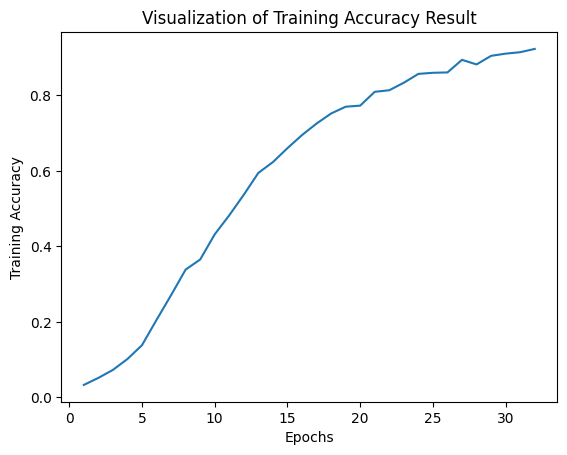

In [81]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

#Validation Accuray Visualization

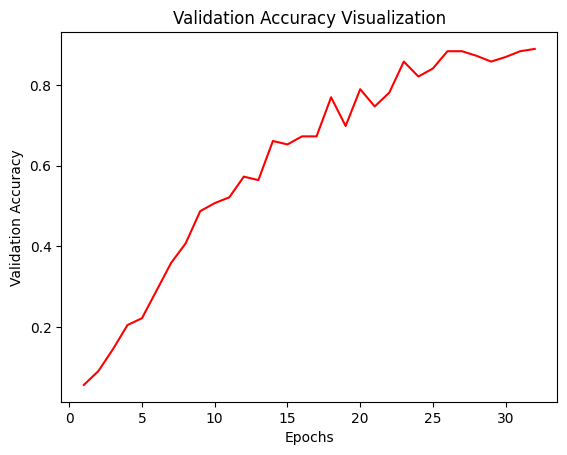

In [82]:
plt.plot(epochs,training_history.history['val_accuracy'], color='red')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Visualization')
plt.show()